# Ciência e Visualização de Dados em Saúde
### Um estudo para predizer futuras doenças cardíacas utilizando Machine Learning

**Motivação**

*   Explorar os benefícios que a Inteligência artificial pode trazer para a área da saúde
*   Quanto mais cedo um problema cardíaco for identificado, mais eficaz será o tratamento e consequentemente menor o risco de óbito.



**Objetivo**

Tentar fazer uma previsão de uma ocorrencia ou não de doença cardiovascular em uma pessoa no periodo de 10 anos, baseado em algumas


caracteristicas físicas e exames, utilizando machine learning.


**Dataset**

(https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea?select=train.csv)

**Features**

**Demographic**: \\
• **Sex**: male or female \\
• **Age**: Age of the patient \\

**Behavioral** \\
• **is_smoking**: whether or not the patient is a current smoker \\
• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day. \\

**Medical( history)** \\
• BP Meds: whether or not the patient was on blood pressure medication \\
• Prevalent Stroke: whether or not the patient had previously had a stroke \\
• Prevalent Hyp: whether or not the patient was hypertensive \\
• Diabetes: whether or not the patient had diabetes \\

**Medical(current)** \\
• Tot Chol: total cholesterol level \\
• Sys BP: systolic blood pressure \\
• Dia BP: diastolic blood pressure \\
• BMI: Body Mass Index \\
• Heart Rate: heart rate \\
• Glucose: glucose level \\

**Target** \\
• 10 year risk of coronary heart disease CHD

### Pre-processamento dos dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("train.csv")
df_val=pd.read_csv("test.csv")


In [ ]:
from sklearn import preprocessing
leSex = preprocessing.LabelEncoder()
leSex.fit(df.sex)
df.sex = leSex.transform(df.sex)
df_val.sex = leSex.transform(df_val.sex)

leSmoking = preprocessing.LabelEncoder()
leSmoking.fit(df.is_smoking)
df.is_smoking = leSmoking.transform(df.is_smoking)
df_val.is_smoking = leSmoking.transform(df_val.is_smoking)

df = df.fillna(method="bfill")
df_val =  df_val.fillna(method="bfill")

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=25)
print(f"No. of training examples: {df_train.shape[0]}")
print(f"No. of validation examples: {df_test.shape[0]}")

No. of training examples: 2712
No. of validation examples: 678


### Relação entre as features


<Axes: >

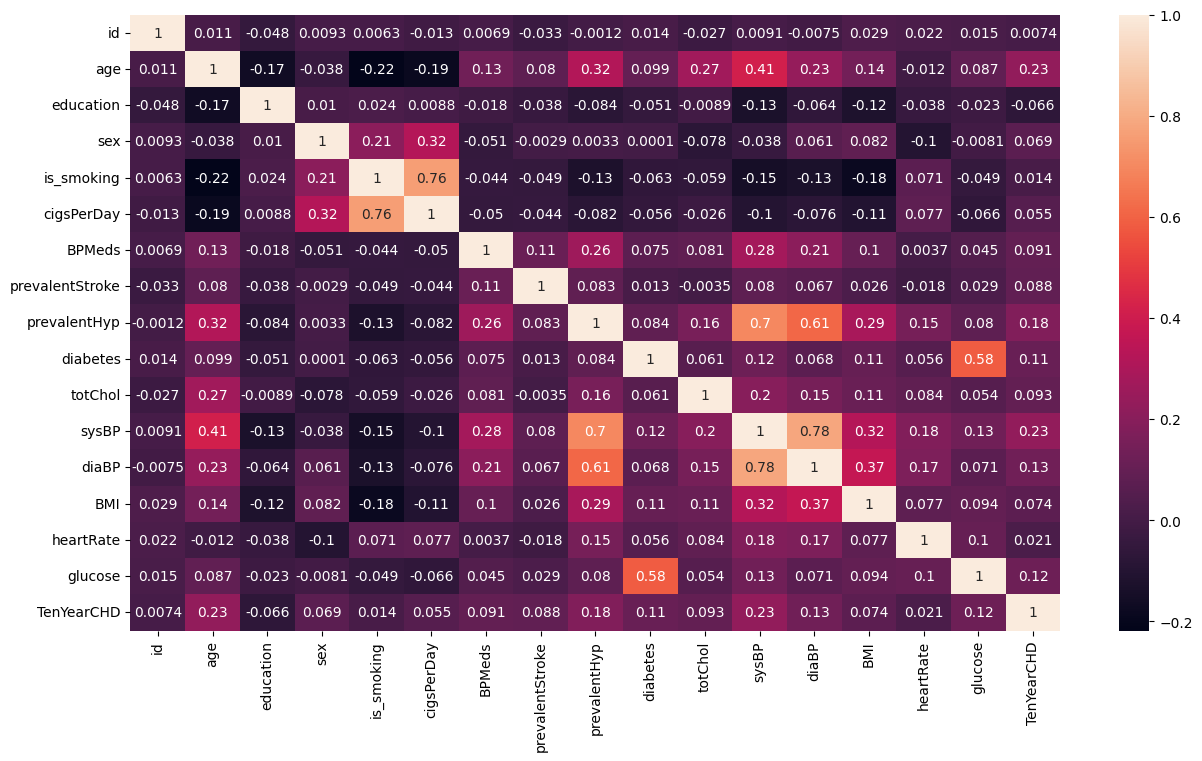

In [ ]:
matrix = df_train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()

x = df_train.drop(['id','TenYearCHD'], axis = 1)
x = scaler_X.fit_transform(x)

y = df_train['TenYearCHD']


x_test = df_test.drop(['id','TenYearCHD'], axis = 1)
x_test = scaler_X.fit_transform(x_test)
y_test = df_test['TenYearCHD']


### Modelagem
**Modelos utilizados na análise**

*   Logistic Regression
*   Random Forest
*   K-Nearest Neighbour

**Metrica usada**

*  Recall -> Pois por se tratar de um caso de uma doença que pode levar a morte, é importante que se diminua o numero de falsos negativos

Foi utilizado o GridSearchCV como metodo de tuning de hyperparametro

In [ ]:
from sklearn.model_selection import GridSearchCV

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

parameters = {
    'penalty':('l1', 'l2', 'elasticnet', None),
    'dual':[True, False],
    'fit_intercept':[True, False]
}



grid_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, scoring = 'recall')
grid_reg.fit(x, y)
y_pred_reg = grid_reg.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      0.58      0.71       575
           1       0.22      0.65      0.33       103

    accuracy                           0.59       678
   macro avg       0.56      0.62      0.52       678
weighted avg       0.80      0.59      0.65       678

0.6504854368932039


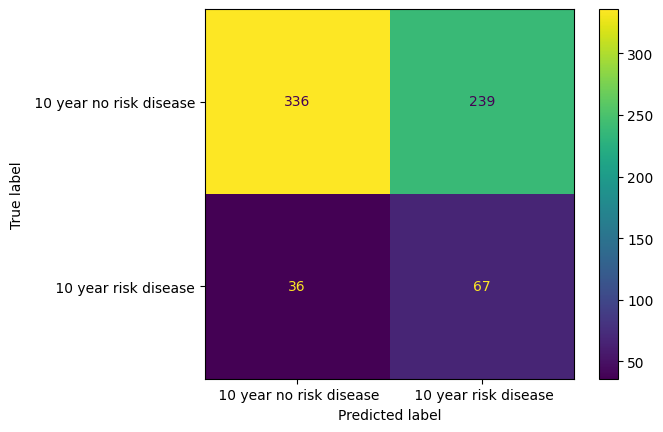

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_reg, display_labels=[' 10 year no risk disease', ' 10 year risk disease'])
print(classification_report(y_test, y_pred_reg))
print(recall_score(y_test, y_pred_reg))


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': list(range(1,100,20)),
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', None]
}



grid_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, scoring = 'recall')
grid_rfc.fit(x, y)
y_pred_rfc = grid_rfc.predict(x_test)



              precision    recall  f1-score   support

           0       0.86      0.88      0.87       575
           1       0.22      0.18      0.20       103

    accuracy                           0.78       678
   macro avg       0.54      0.53      0.54       678
weighted avg       0.76      0.78      0.77       678

0.18446601941747573


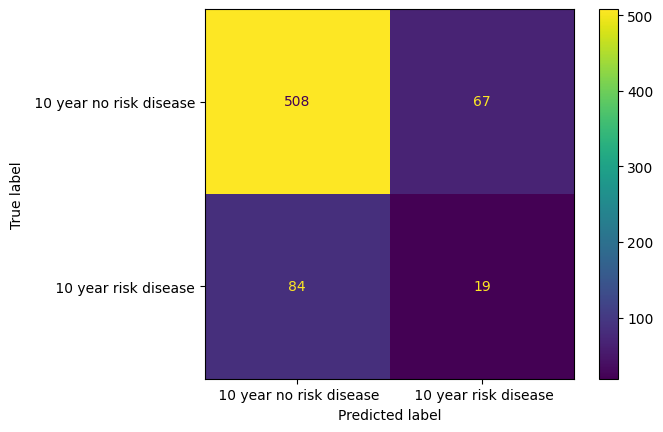

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc, display_labels=[' 10 year no risk disease', ' 10 year risk disease'])
print(classification_report(y_test, y_pred_rfc))
print(recall_score(y_test, y_pred_rfc))

### **K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': list(range(0,10,1)),
    'weights':['uniform', None],
    'algorithm':['auto', 'ball_tree', 'kd_tree','brute']
}



grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, scoring = 'recall')
grid_knn.fit(x, y)
y_pred_knn = grid_knn.predict(x_test)


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       575
           1       0.24      0.20      0.22       103

    accuracy                           0.78       678
   macro avg       0.55      0.54      0.54       678
weighted avg       0.77      0.78      0.77       678

0.20388349514563106


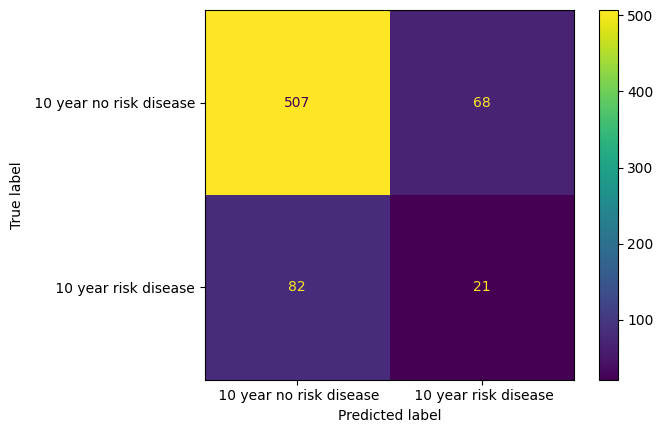

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=[' 10 year no risk disease', ' 10 year risk disease'])
print(classification_report(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))

### **Predição Final**

In [ ]:
df_val =  df_val.fillna(method="bfill")
df_val =  df_val.fillna(method="ffill")

***Predição do Random Forest, que teve o pior Recall, mas a melhor acuracia***

In [ ]:
y_pred_val_rfc = grid_rfc.predict(df_val.drop(['id'], axis=1))
len(y_pred_val_rfc[y_pred_val_rfc==1])/len(y_pred_val_rfc)

1.0

**Predição do Logistic Regression, que teve o melhor Recall, por isso decidimos como o modelo final**

In [ ]:
y_pred_val = grid_reg.predict(df_val.drop(['id'], axis=1))
len(y_pred_val[y_pred_val==1])/len(y_pred_val)

1.0

### **Conclusão**

Apesar de ser o que teve a menor acurácia, o modelo de Logistic Regression foi o modelo que apresentou a melhor métrica de Recall. Apresentando um Recall de 65%.

Entretanto na predição do conjunto de test ( que não temos a resposta ), o modelo final ( Logistic Regression ) preve em 100% dos casos afirmando que a pessoa terá doença cardiovascular no periodo de 10 anos. Apesar disso, o Random Forest tambem afirmou que 100% dos casos a pessoa tera uma doença cardiovascular em 10 anos, então é possivel que o conjunto de teste tenha em sua maioria pessoas que terão doença cardiovascular.

Observando o gráfico de correlação entre as features é possível observar que as caracteríticas *idade*, *pressão arterial sistólica* e *se o paciente teve algum historico de AVC* são as que tem uma maior correlação com a presença ou não de doença cardiovascular no periodo de 10 anos.
